In [2]:
#BERT 

In [3]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [4]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

In [5]:
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

In [6]:
model = BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
tokenizer = BertTokenizer.from_pretrained(model_name)

In [8]:
#Embedding

In [9]:
question = "when was the first dvd released?"
answer = "The First DVD released on March24"

In [10]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer)

In [11]:
print(encoding)

{'input_ids': [101, 2043, 2001, 1996, 2034, 4966, 2207, 1029, 102, 1996, 2034, 4966, 2207, 2006, 2233, 18827, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [12]:
inputs= encoding['input_ids']

In [13]:
sentence_embedding = encoding['token_type_ids']

In [14]:
tokens= tokenizer.convert_ids_to_tokens(inputs)

In [15]:
tokenizer.decode(101)

'[CLS]'

In [16]:
tokenizer.decode(102)

'[SEP]'

In [17]:
output = model(input_ids = torch.tensor([inputs]), token_type_ids = torch.tensor([sentence_embedding]))

In [20]:
print(output)

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-5.4373, -5.0241, -6.7779, -5.8874, -6.2433, -5.8548, -6.0546, -8.0856,
         -5.4370,  1.5921, -0.1958, -3.0386, -1.2741,  1.6843,  7.5442, -0.2129,
         -5.4366]], grad_fn=<CloneBackward0>), end_logits=tensor([[-0.3460, -5.5309, -5.9385, -7.2448, -6.2822, -4.5623, -6.0699, -5.8281,
         -0.3456, -4.7716, -4.0137, -3.5112, -3.5072, -2.6796,  0.6125,  7.1927,
         -0.3470]], grad_fn=<CloneBackward0>), hidden_states=None, attentions=None)


In [18]:
#Model output

In [19]:
start_index = torch.argmax(output.start_logits)

In [21]:
end_index = torch.argmax(output.end_logits)

In [22]:
print(start_index, end_index)

tensor(14) tensor(15)


In [23]:
answer =  ' '.join(tokens[start_index:end_index+1])

In [24]:
print(answer)

march ##24


In [25]:
import matplotlib as plt
import seaborn as sns


In [28]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()

In [29]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:}-{:>2}'.format(token, i))

C:\Users\shett\AppData\Local\Temp\ipykernel_8280\606632143.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='center')


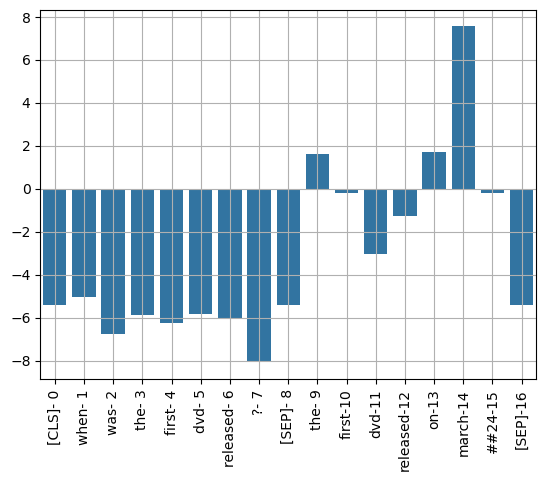

In [31]:
ax = sns.barplot(x=token_labels, y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='center')
ax.grid(True)

In [ ]:


#Customized question and answer (FAQ bot)

In [34]:
sunset_motors_context = "Sunset Motors is a reputable car dealership recognized for its vast inventory of new and certified pre-owned vehicles, catering to diverse preferences and budgets. Strategically located in the heart of the city, the dealership focuses on providing a seamless, personalized car-buying experience for each customer. With a team of highly trained automotive experts, they guide clients through every step, ensuring that they find the perfect vehicle to match their needs. Sunset Motors offers flexible financing solutions, collaborating with multiple lenders to secure competitive rates, along with convenient trade-in options for those looking to upgrade their current cars. The dealership prides itself on creating a pressure-free, transparent sales environment, aiming to build trust and long-lasting relationships with customers. Beyond selling cars, Sunset Motors is committed to after-sales support, offering comprehensive maintenance and repair services to keep vehicles running smoothly. Their service department is staffed by skilled technicians who use the latest tools and genuine parts to ensure top-quality repairs. Whether it's routine servicing, major repairs, or simply getting expert advice, clients can rely on Sunset Motors for exceptional care. The dealership's reputation for honesty, reliability, and customer-first values has made it a preferred choice among car buyers, earning them a loyal client base that trusts them for all automotive needs."

In [35]:
print(sunset_motors_context)

Sunset Motors is a reputable car dealership recognized for its vast inventory of new and certified pre-owned vehicles, catering to diverse preferences and budgets. Strategically located in the heart of the city, the dealership focuses on providing a seamless, personalized car-buying experience for each customer. With a team of highly trained automotive experts, they guide clients through every step, ensuring that they find the perfect vehicle to match their needs. Sunset Motors offers flexible financing solutions, collaborating with multiple lenders to secure competitive rates, along with convenient trade-in options for those looking to upgrade their current cars. The dealership prides itself on creating a pressure-free, transparent sales environment, aiming to build trust and long-lasting relationships with customers. Beyond selling cars, Sunset Motors is committed to after-sales support, offering comprehensive maintenance and repair services to keep vehicles running smoothly. Their s

In [38]:
def faq_bot(question):
    context = sunset_motors_context
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_idx+1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1] * num_seg_b
    output = model(torch.tensor([input_ids]),token_type_ids = torch.tensor([segment_ids]))
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    if answer_end> answer_start:
        answer = ' '.join(tokens[answer_start:answer_end+1])
    else:
        print("I dont know the answer ask me another")
    corrected_answer = ''
    for word in answer.split():
        if word[0:2] == "##":
            corrected_answer += word[2:]
        else:
            corrected_answer += ' '+ word
    return corrected_answer


In [39]:
faq_bot("what is sunset motors")

' a reputable car dealership'

In [40]:
faq_bot("explain deep about sunset motors")

" the dealership ' s reputation for honesty , reliability , and customer - first values"

In [41]:
faq_bot("where it is located")

' strategically located in the heart of the city'